Use virtual environment's python interpreter to run the notebook

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.float_format', lambda x: f'{x:.128f}')


In [2]:
df32 = pd.read_csv("data32.csv").astype(np.float128, errors='ignore')
df64 = pd.read_csv("data64.csv").astype(np.float128, errors='ignore')
dataNone = pd.read_csv("dataNone.csv").astype(np.float128, errors='ignore')

In [3]:
df32.shot.nunique()

212

In [4]:
nan_columns = df32.columns[df32.isna().all()]
print("Columns with NaNs:", nan_columns.tolist())

Columns with NaNs: ['time_until_disrupt']


In [5]:
# Drop time_until_disrupt from df32, df64, and dataNone
df32 = df32.drop(columns=['time_until_disrupt'])
df64 = df64.drop(columns=['time_until_disrupt'])
dataNone = dataNone.drop(columns=['time_until_disrupt'])

In [27]:
# Get maximum values id df64
max_values = df64.abs().max()

# Get the position of the maximum value for each column
max_positions = df64.abs().idxmax()

# Get the max values for each column in df32 at the same positions as in df64
max_values_df32 = pd.Series({col: abs(df32.loc[max_positions[col], col]) for col in df32.columns})

# Get the max values for each column in dataNone at the same positions as in df64
max_values_dataNone = pd.Series({col: abs(dataNone.loc[max_positions[col], col]) for col in dataNone.columns})

In [28]:
# Compute absolute differences
diff_abs =  max_values - max_values_df32

# Sort the differences in descending order and get the top 10
top_10_differences = diff_abs.sort_values(ascending=False).head(10)

# Display the column names and their corresponding max differences
top_10_differences
# covert to  pd.DataFrame
top_10_differences_df = top_10_differences.reset_index()
top_10_differences_df.columns = ['column_name', 'max_difference']
top_10_differences_df

,column_name,max_difference
0,n_e,11734055124992.00000000000000000000000000000000...
1,dip_dt,127.9965888261795043945312500000000000000000000...
2,dipprog_dt,7.265183150768280029296875000000000000000000000...
3,p_input,4.781704574823379516601562500000000000000000000...
4,p_oh,4.781701102852821350097656250000000000000000000...
5,dwmhd_dt,0.142002239823341369628906250000000000000000000...
6,sxr,0.010930250806268304586410522460937500000000000...
7,p_lh,0.010771524743176996707916259765625000000000000...
8,radiated_fraction,0.007682373223360627889633178710937500000000000...
9,wmhd,0.002499999944120645523071289062500000000000000...


In [29]:
max_positions

idx            17801
shot           17721
time            8887
a_minor         8890
beta_n         15345
               ...  
wmhd           15345
z_error        17442
z_prog          8331
z_times_v_z    17720
zcur           17442
Length: 63, dtype: int64

In [31]:
max_values

idx           17801.00000000000000000000000000000000000000000...
shot          1160923003.000000000000000000000000000000000000...
time          2.099999904632568359375000000000000000000000000...
a_minor       0.234144672751426696777343750000000000000000000...
beta_n        71.32112899835841801632341230288147926330566406...
                                     ...                        
wmhd          958566.0625000000000000000000000000000000000000...
z_error       0.455485078658670494711202536564087495207786560...
z_prog        0.026999997720122199257319905996155284810811281...
z_times_v_z   17.74467924928813289398021879605948925018310546...
zcur          0.455446869802137388472118573190527968108654022...
Length: 63, dtype: float128

Column: a_minor, Max Shot: 1100121018.0, Max Value: 0.2341446727514267, Diff: 2.75142669758921e-09, % Rel Diff: 0.000001%


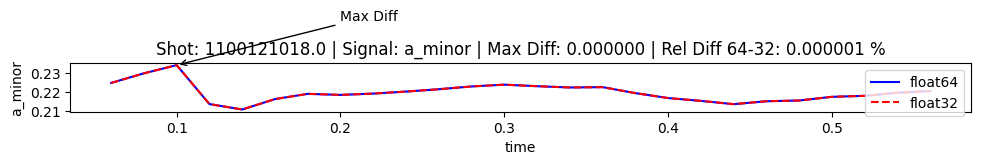

Column: beta_n, Max Shot: 1120920017.0, Max Value: 71.32112899835842, Diff: -9.32539192888271e-06, % Rel Diff: -0.000013%


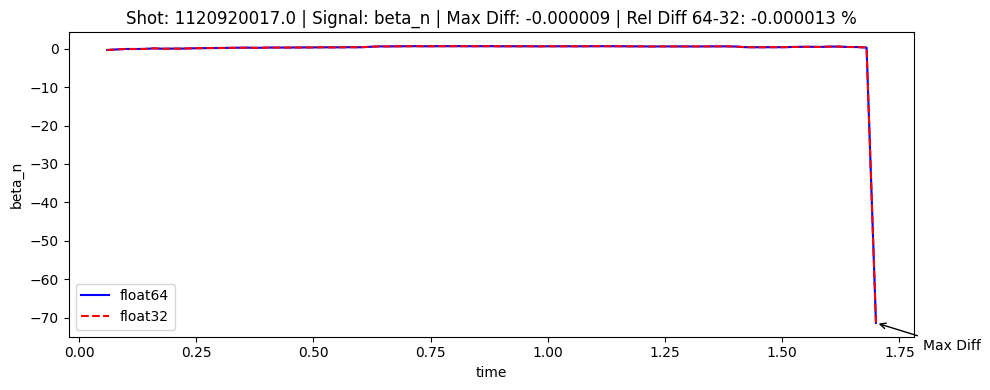

Column: beta_p, Max Shot: 1120920017.0, Max Value: 5.355179786682129, Diff: -2.1331787092293553e-07, % Rel Diff: -0.000004%


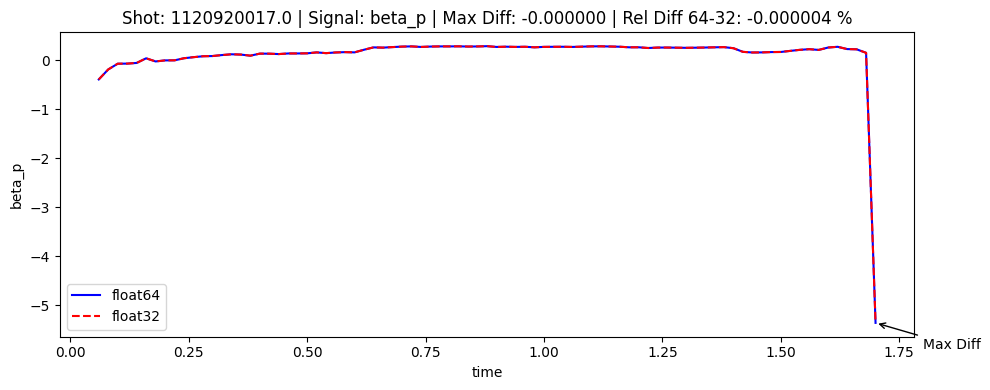

Column: bt, Max Shot: 1110310022.0, Max Value: 8.032615499684239, Diff: -1.6195657970285993e-07, % Rel Diff: -0.000002%


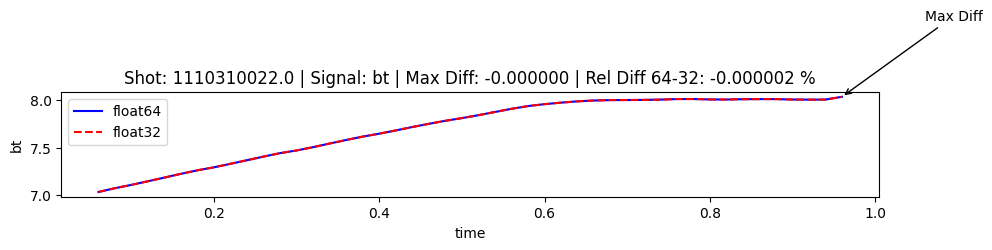

Column: chisq, Max Shot: 1110310022.0, Max Value: 1573.0091552734375, Diff: -4.472656246434781e-05, % Rel Diff: -0.000003%


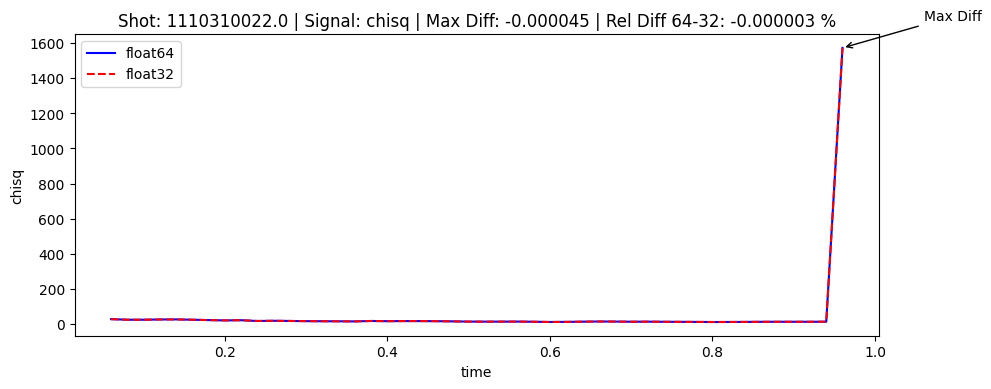

Column: dbetap_dt, Max Shot: 1120920017.0, Max Value: 275.55475436902464, Diff: 4.3690246229743934e-06, % Rel Diff: 0.000002%


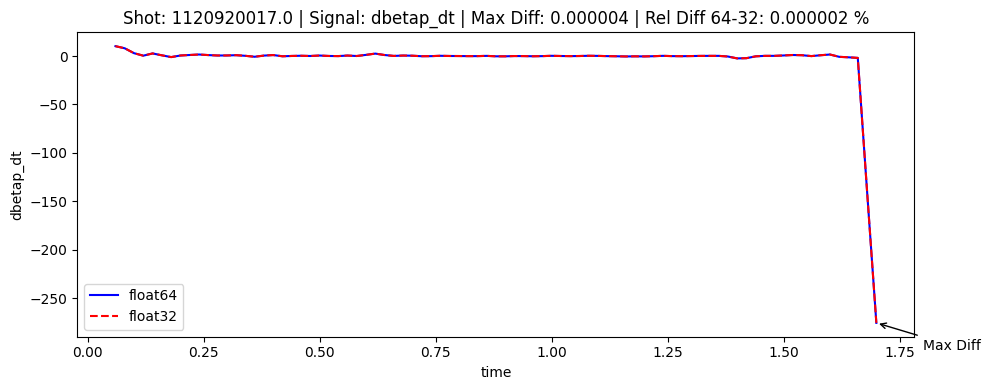

Column: dip_dt, Max Shot: 1150929010.0, Max Value: 684936396.7309638, Diff: 127.9965888261795, % Rel Diff: 0.000019%


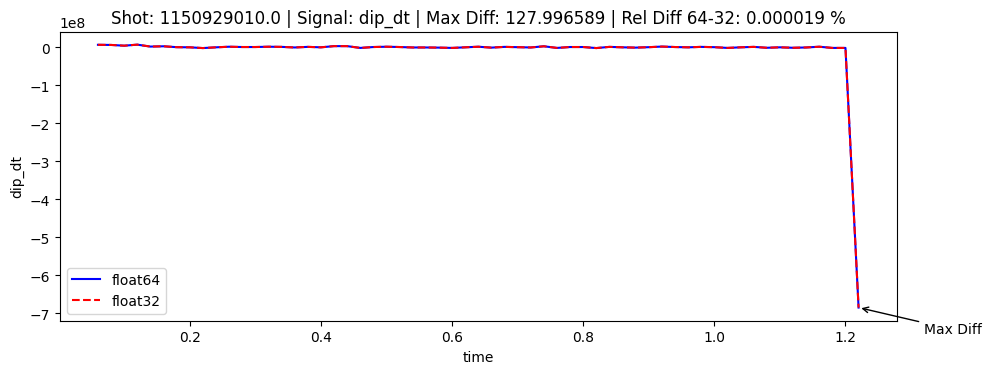

Column: dip_smoothed, Max Shot: 1110310022.0, Max Value: 714097700.8981963, Diff: -75.10180366039276, % Rel Diff: -0.000011%


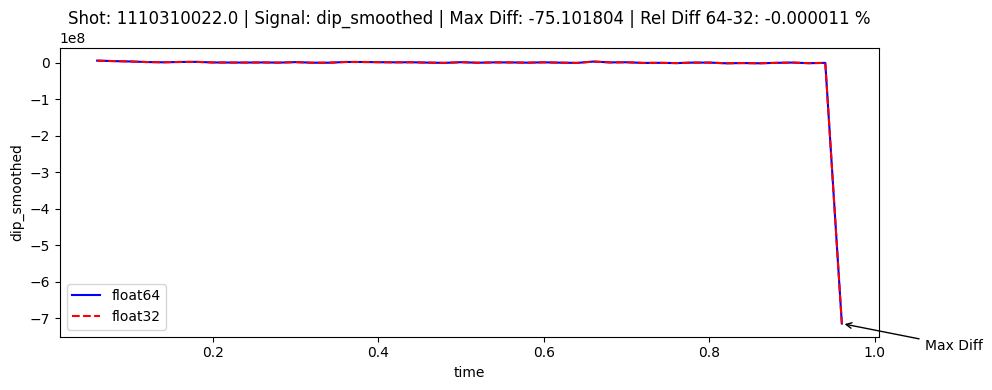

Column: dipprog_dt, Max Shot: 1140522016.0, Max Value: 77493815.51580259, Diff: 7.26518315076828, % Rel Diff: 0.000009%


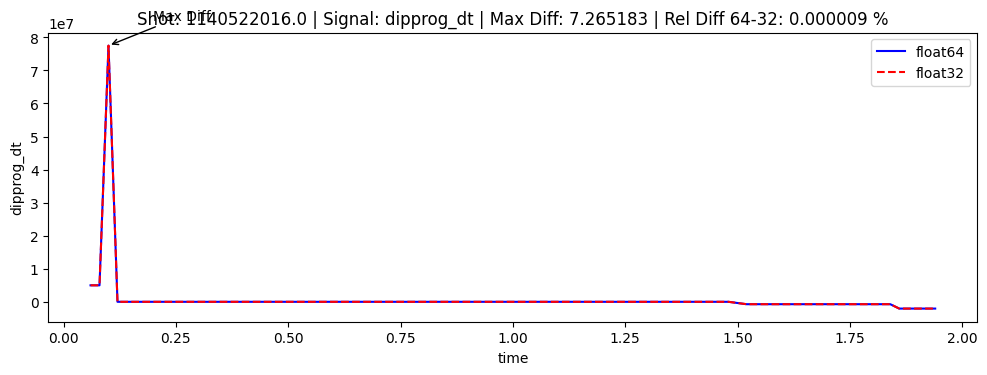

Column: dli_dt, Max Shot: 1101209012.0, Max Value: 210.38731135111937, Diff: 1.3511193515114428e-06, % Rel Diff: 0.000001%


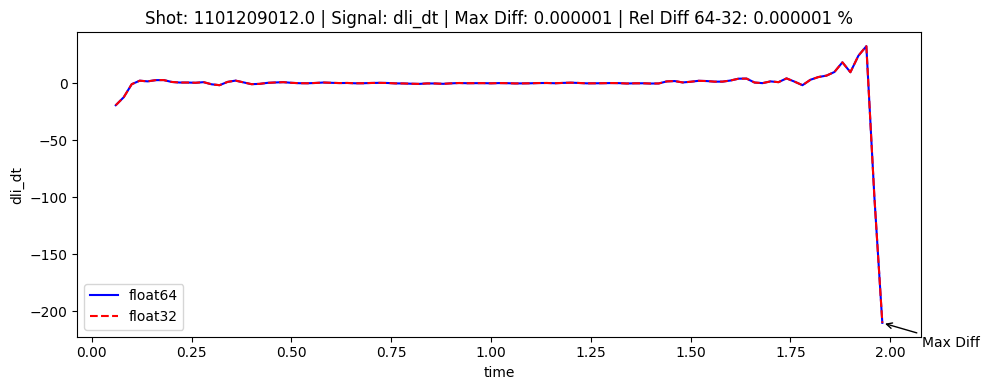

Column: dn_dt, Max Shot: 1080523020.0, Max Value: 1.201840440665809e+23, Diff: -2.440316637203661e+16, % Rel Diff: -0.000020%


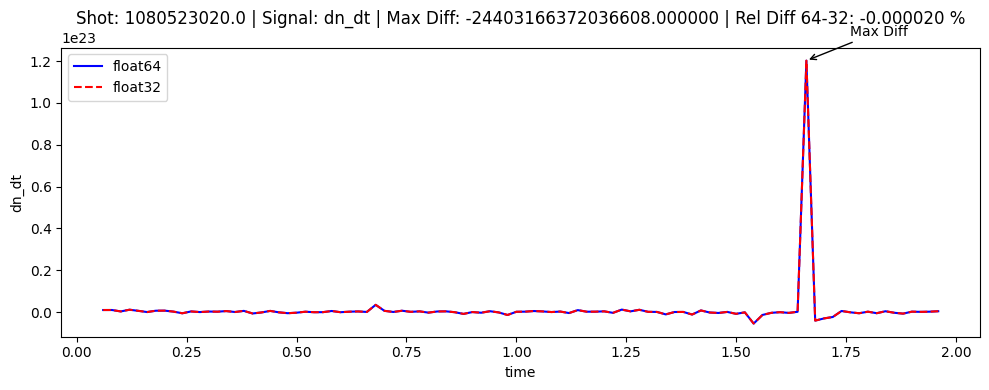

Column: dprad_dt, Max Shot: 1110309022.0, Max Value: 57382261968.66269, Diff: -2823.3373107910156, % Rel Diff: -0.000005%


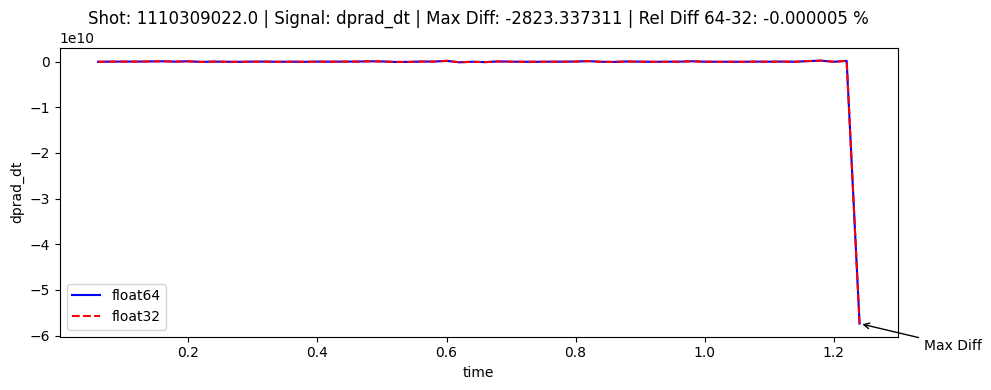

Column: dwmhd_dt, Max Shot: 1120920017.0, Max Value: 49063332.14200224, Diff: 0.14200223982334137, % Rel Diff: 0.000000%


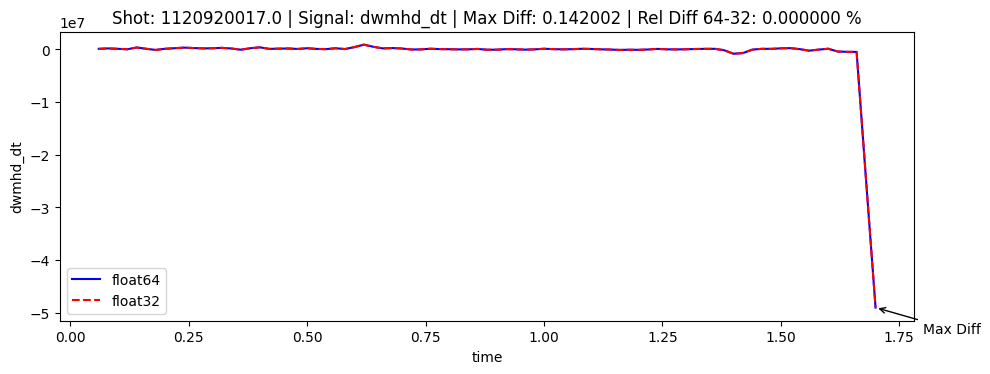

Column: greenwald_fraction, Max Shot: 1050623010.0, Max Value: 1.759360255057388, Diff: 1.582968511826266e-07, % Rel Diff: 0.000009%


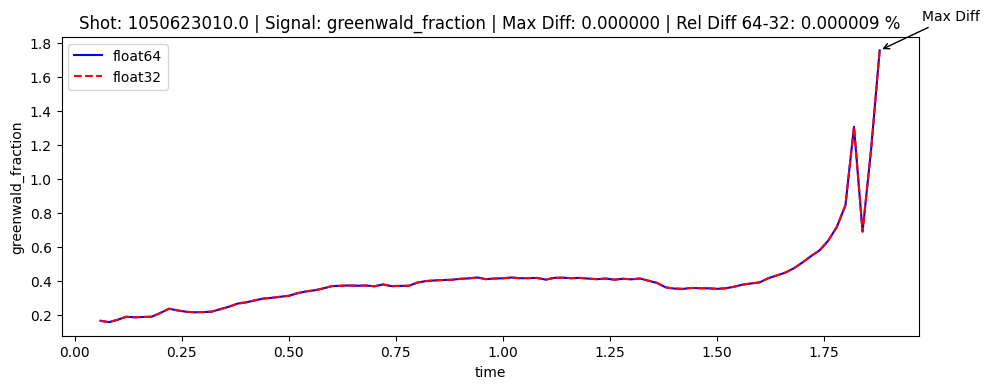

Column: i_efc, Max Shot: 1000511005.0, Max Value: 2982.430079189516, Diff: 1.7616002878639847e-08, % Rel Diff: 0.000000%


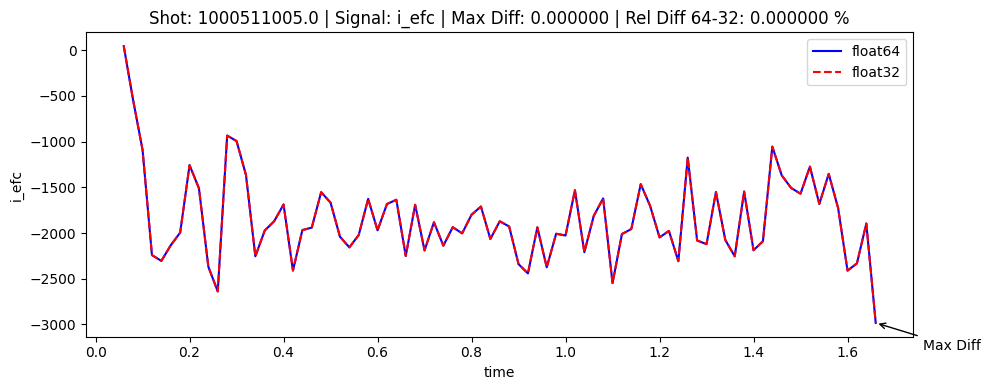

Column: ip, Max Shot: 1070829008.0, Max Value: 1363284.9375, Diff: -5.118316039443016e-06, % Rel Diff: -0.000000%


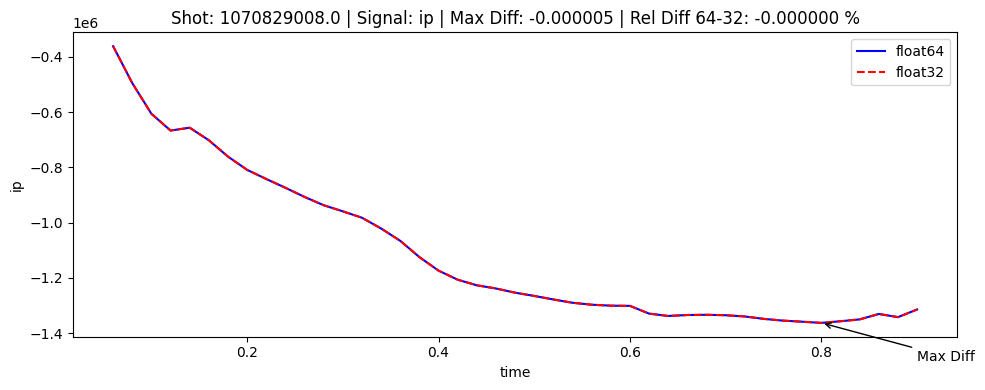

Column: ip_error, Max Shot: 1110310022.0, Max Value: 862492.1414145457, Diff: 0.0015648193657398224, % Rel Diff: 0.000000%


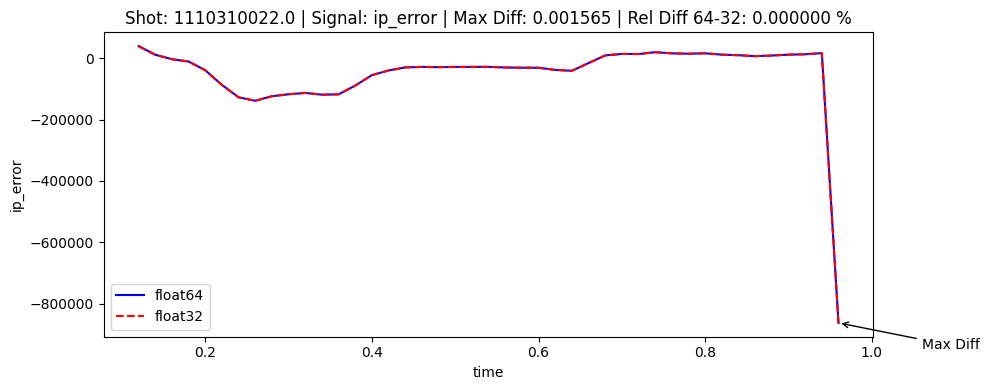

Column: kappa, Max Shot: 1070829028.0, Max Value: 1.8562453985214236, Diff: -1.4785763724489698e-09, % Rel Diff: -0.000000%


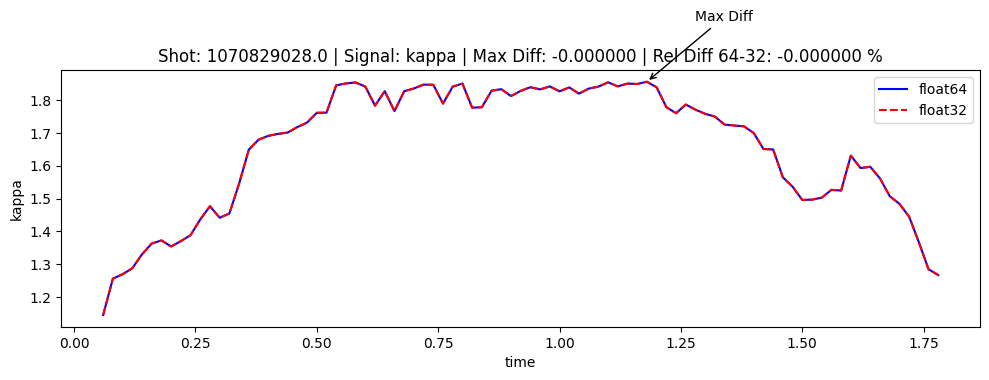

Column: kappa_area, Max Shot: 1150929010.0, Max Value: 1.6313059872280342, Diff: 5.74244318762851e-08, % Rel Diff: 0.000004%


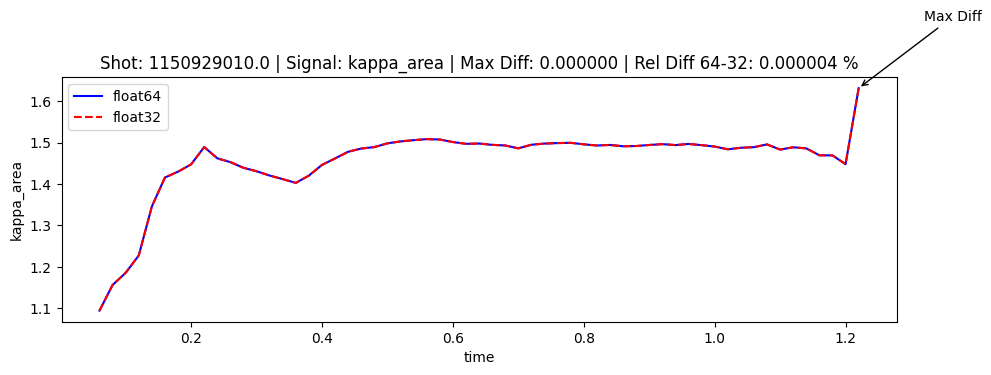

Column: li, Max Shot: 1100210012.0, Max Value: 5.6002068519592285, Diff: -1.4804077164143337e-07, % Rel Diff: -0.000003%


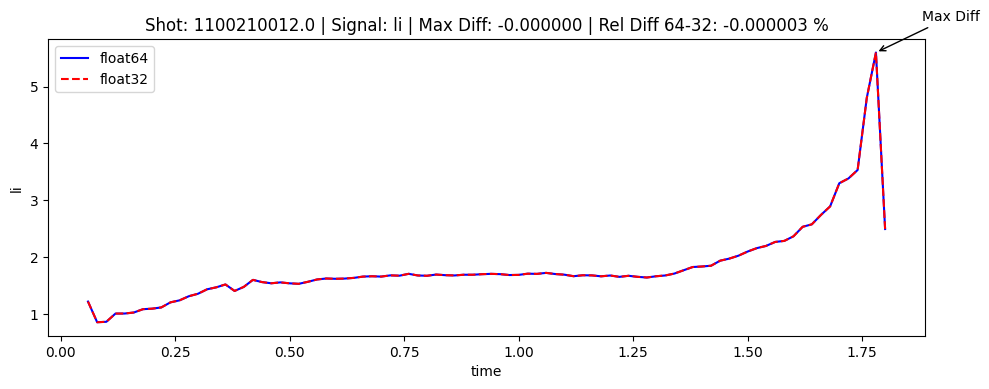

Column: lower_gap, Max Shot: 1091016033.0, Max Value: 0.6128580570220947, Diff: -2.977905255718838e-09, % Rel Diff: -0.000000%


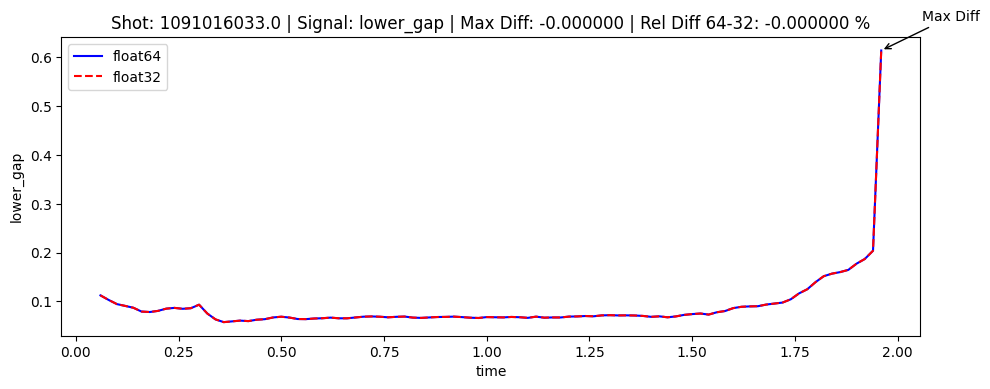

Column: n_e, Max Shot: 990225018.0, Max Value: 5.285090071531424e+20, Diff: 11734055124992.0, % Rel Diff: 0.000002%


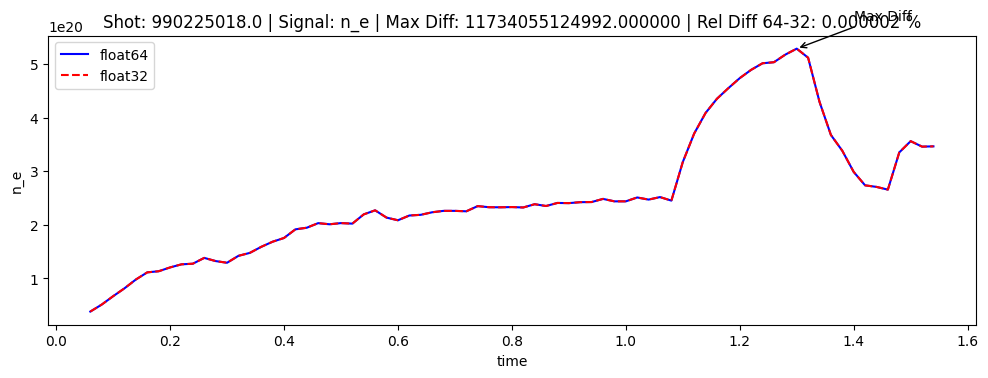

Column: n_equal_1_mode, Max Shot: 1100210012.0, Max Value: 20.10097158527517, Diff: -4.5500844336743285e-07, % Rel Diff: -0.000002%


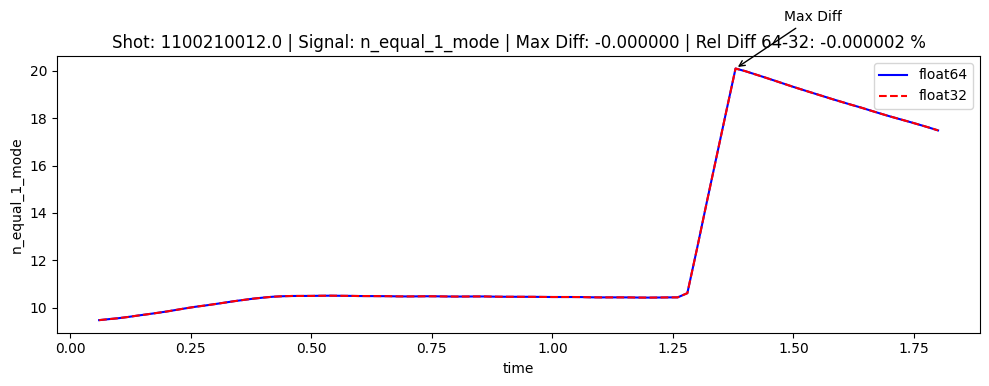

Column: n_equal_1_normalized, Max Shot: 1091014007.0, Max Value: 4.373698246805372, Diff: -7.85615821286001e-08, % Rel Diff: -0.000002%


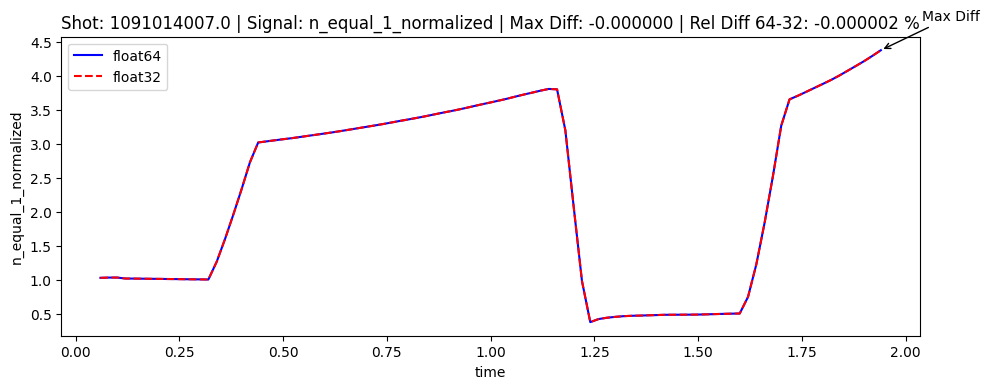

Column: n_equal_1_phase, Max Shot: 1160921021.0, Max Value: 3.1400133614410137, Diff: -1.9994369178100158e-06, % Rel Diff: -0.000064%


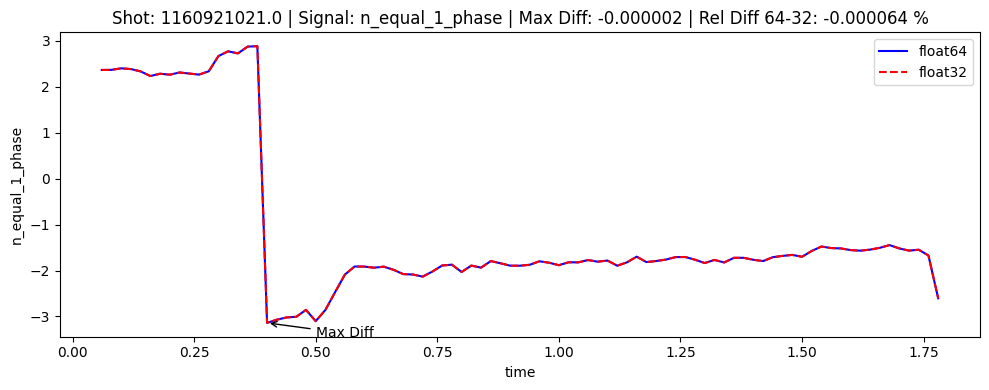

Column: n_over_ncrit, Max Shot: 1120920017.0, Max Value: 177.58555603027344, Diff: -3.969726549257757e-06, % Rel Diff: -0.000002%


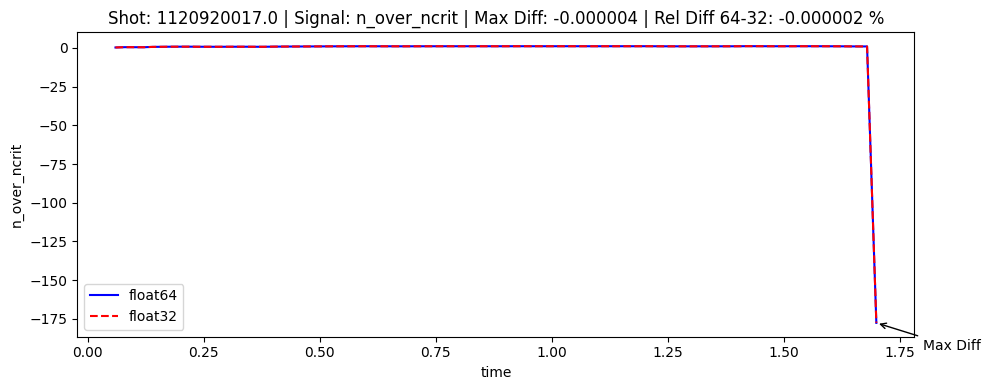

Column: ne_peaking, Max Shot: 1100204019.0, Max Value: 4.445094257996015, Diff: -2.484535066571425e-08, % Rel Diff: -0.000001%


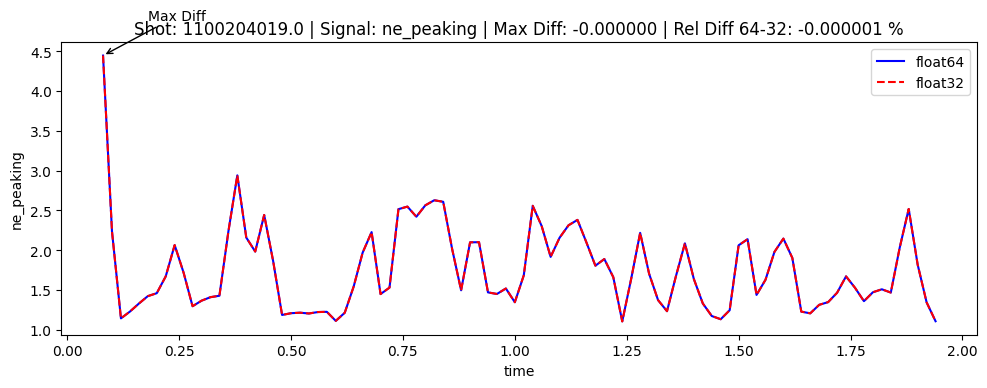

Column: p_icrf, Max Shot: 1101209029.0, Max Value: 5726233.48236084, Diff: -0.018232345581054688, % Rel Diff: -0.000000%


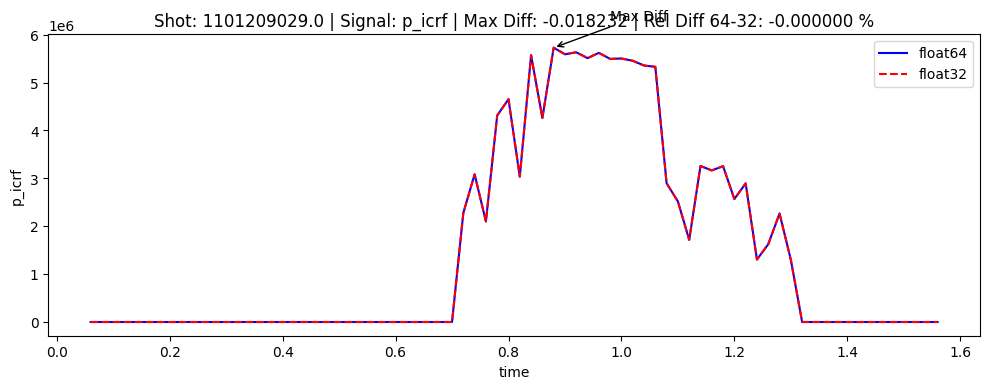

Column: p_input, Max Shot: 1150929010.0, Max Value: 45706632.73721237, Diff: 4.7817045748233795, % Rel Diff: 0.000010%


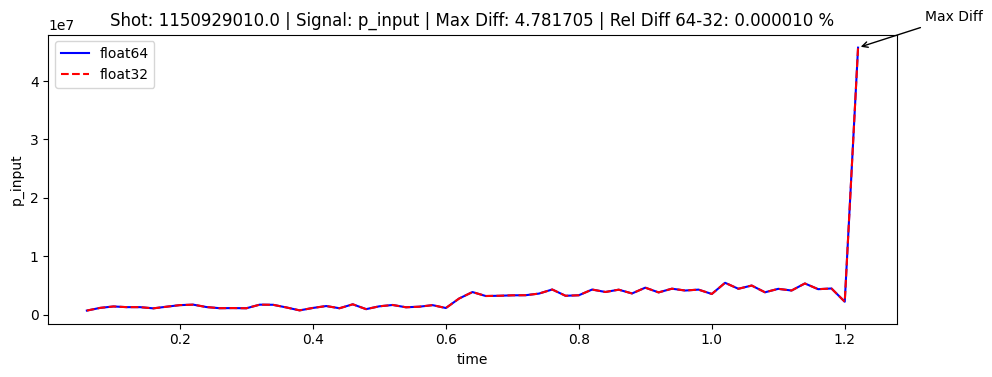

Column: p_lh, Max Shot: 1110106023.0, Max Value: 805922.3244068668, Diff: 0.010771524743176997, % Rel Diff: 0.000001%


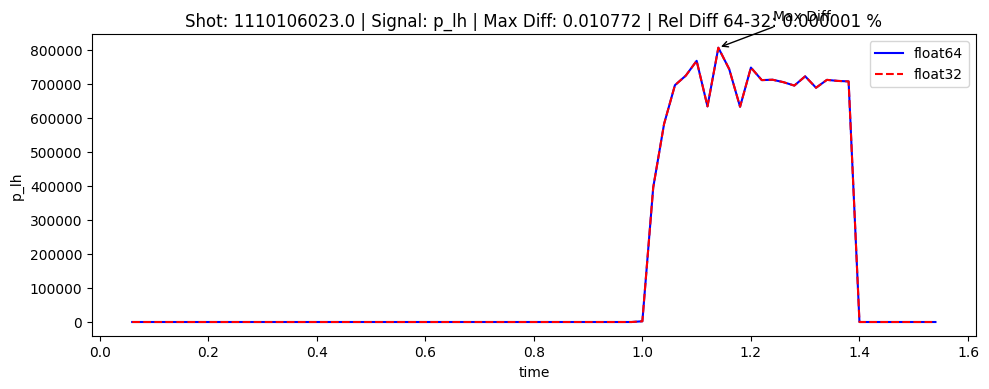

Column: p_oh, Max Shot: 1150929010.0, Max Value: 45706540.50040361, Diff: 4.781701102852821, % Rel Diff: 0.000010%


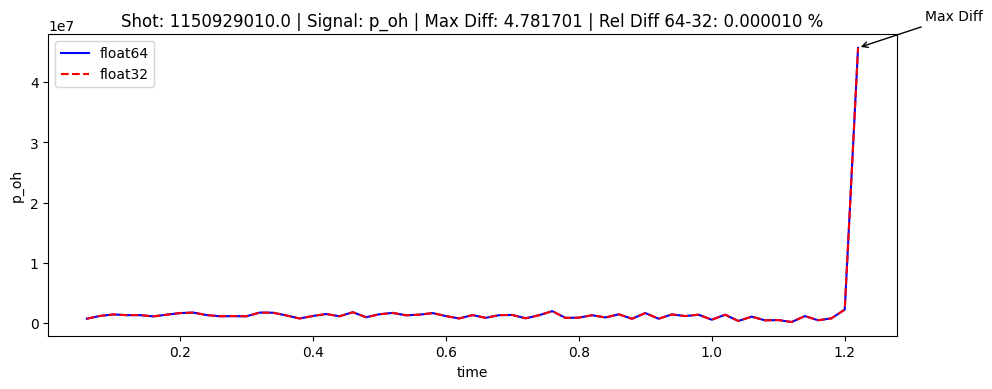

Column: p_rad, Max Shot: 1150929010.0, Max Value: 48823485.71908414, Diff: -0.7474075555801392, % Rel Diff: -0.000002%


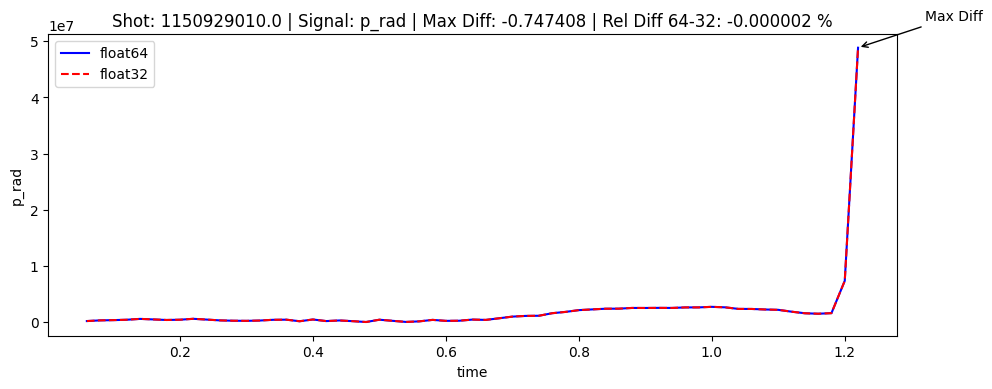

Column: prad_peaking, Max Shot: 1070830005.0, Max Value: 3.554120735633288, Diff: 1.3636336504418978e-10, % Rel Diff: 0.000000%


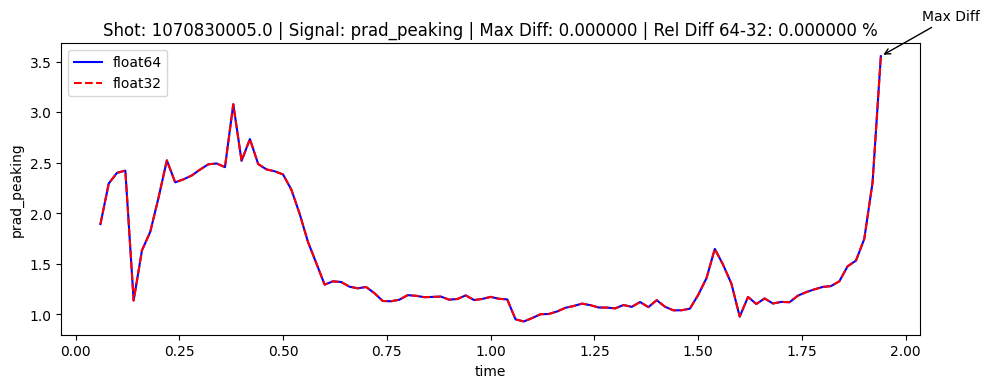

Column: pressure_peaking, Max Shot: 1100204004.0, Max Value: 3.907885187424711, Diff: 1.708413499557082e-08, % Rel Diff: 0.000000%


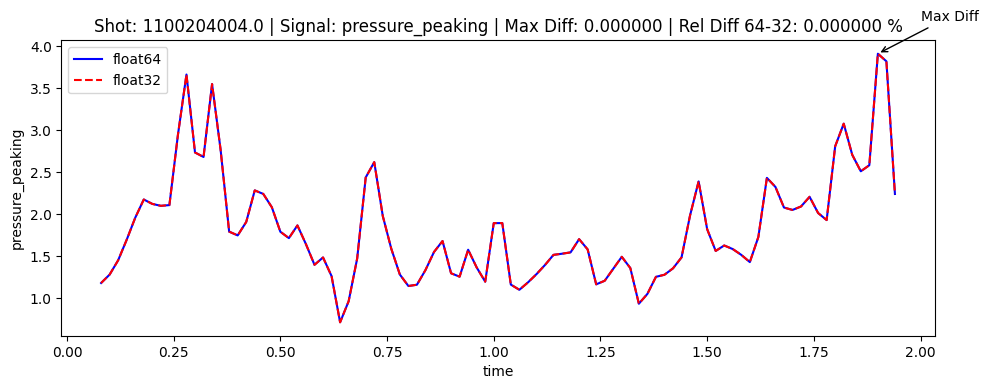

Column: q0, Max Shot: 1150929010.0, Max Value: 4.050968170166016, Diff: 1.7016601550068344e-07, % Rel Diff: 0.000004%


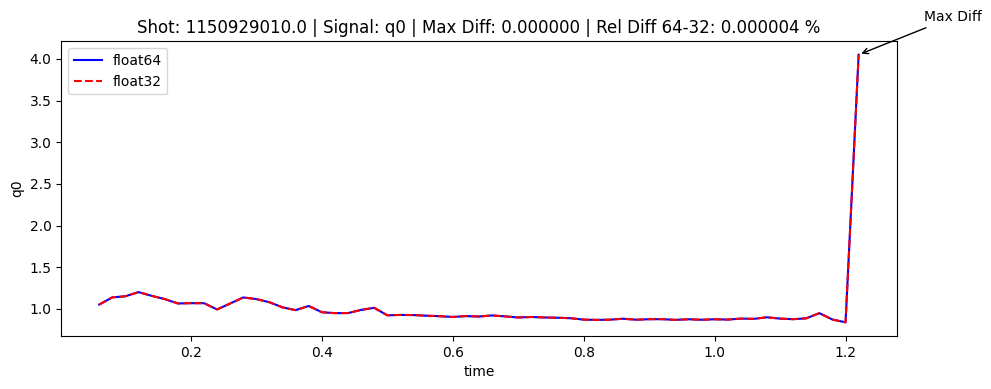

Column: q95, Max Shot: 1101209021.0, Max Value: 22.402572631835938, Diff: -3.681640627917204e-07, % Rel Diff: -0.000002%


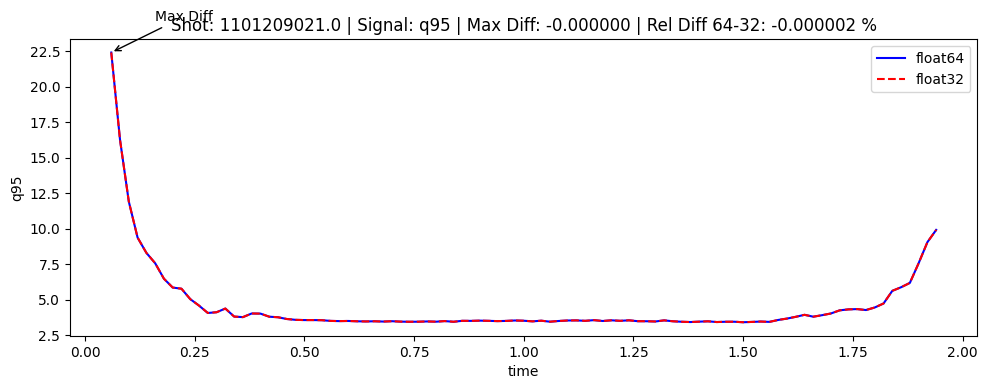

Column: qstar, Max Shot: 1110106010.0, Max Value: 45.833457946777344, Diff: -5.322265650420377e-08, % Rel Diff: -0.000000%


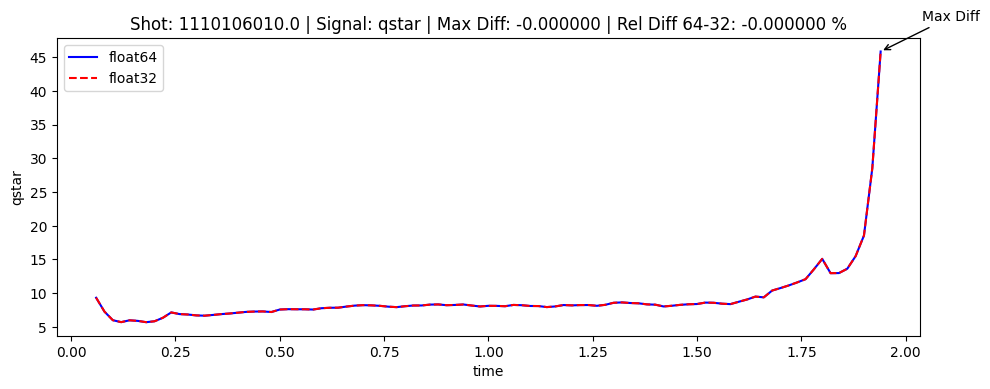

Column: radiated_fraction, Max Shot: 1110317015.0, Max Value: 170794.40924260844, Diff: 0.007682373223360628, % Rel Diff: 0.000004%


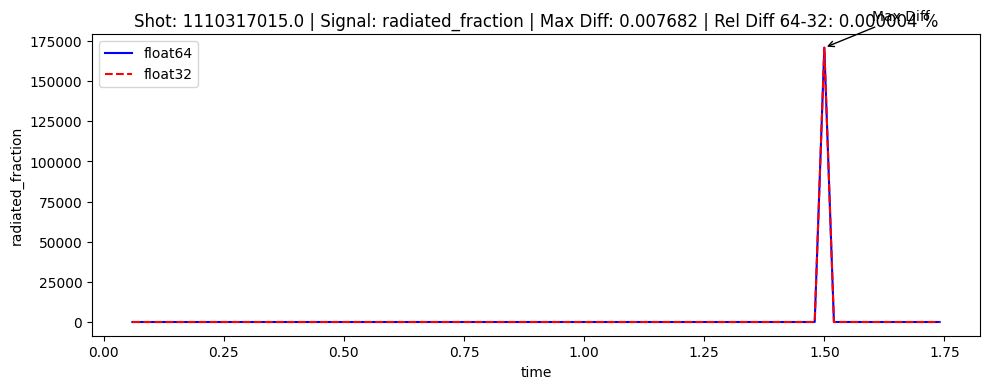

Column: rmagx, Max Shot: 1100817017.0, Max Value: 0.8015883564949036, Diff: -3.505096435318933e-09, % Rel Diff: -0.000000%


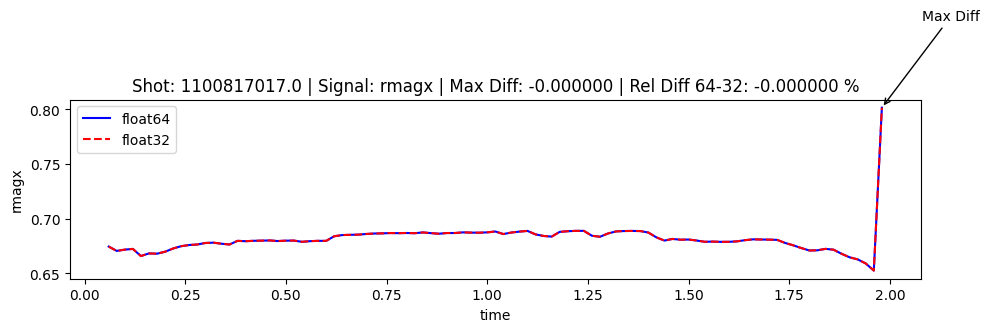

Column: ssep, Max Shot: 950112023.0, Max Value: 0.4000000059604645, Diff: 5.960464455334602e-09, % Rel Diff: 0.000001%


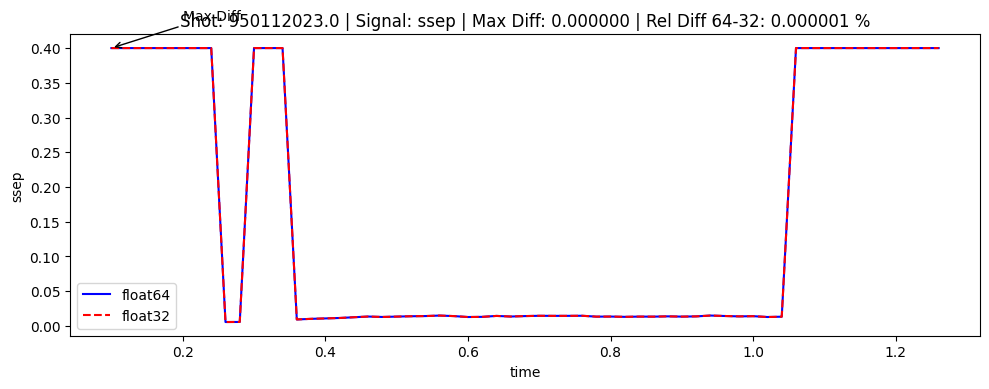

Column: sxr, Max Shot: 1101209029.0, Max Value: 400914.3546802508, Diff: 0.010930250806268305, % Rel Diff: 0.000003%


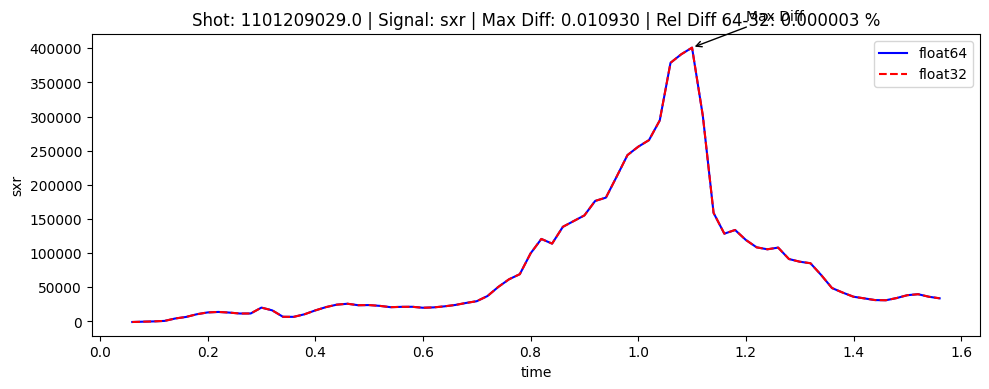

Column: tau_rad, Max Shot: 1120829022.0, Max Value: 88.50351948132528, Diff: -0.0003788098271400031, % Rel Diff: -0.000428%


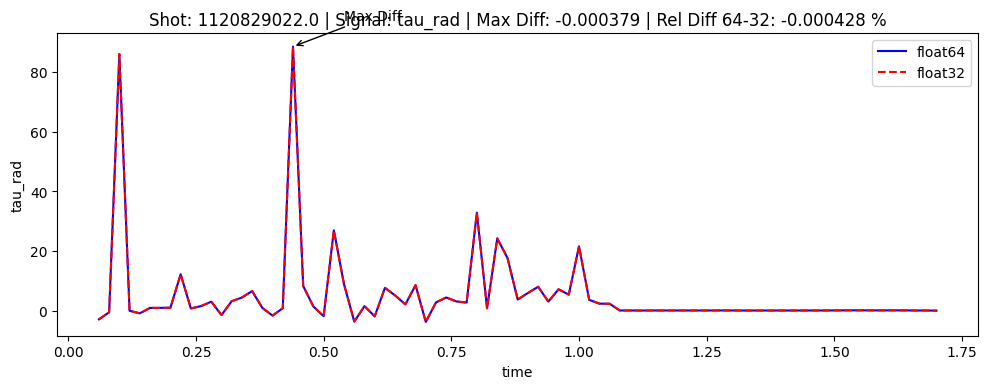

Column: te_core_vs_avg_ece, Max Shot: 1070829028.0, Max Value: 3.9786468879419497, Diff: 2.1005795769468705e-08, % Rel Diff: 0.000001%


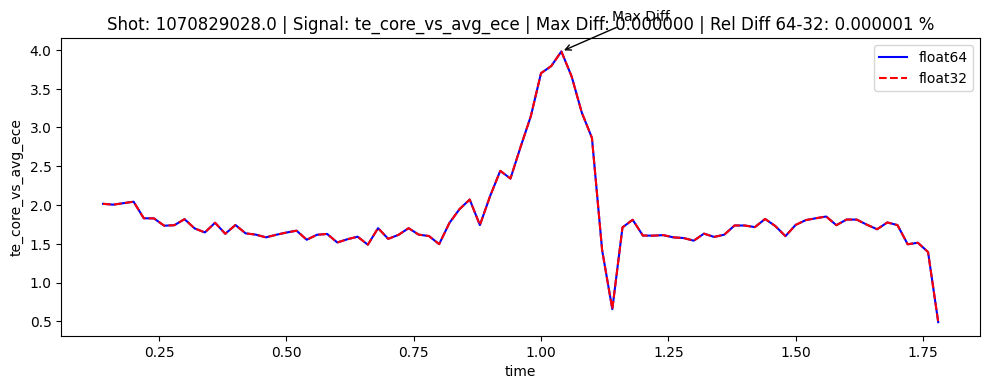

Column: te_edge_vs_avg_ece, Max Shot: 1100210012.0, Max Value: 1.2491372858446383, Diff: -2.2549857536802165e-09, % Rel Diff: -0.000000%


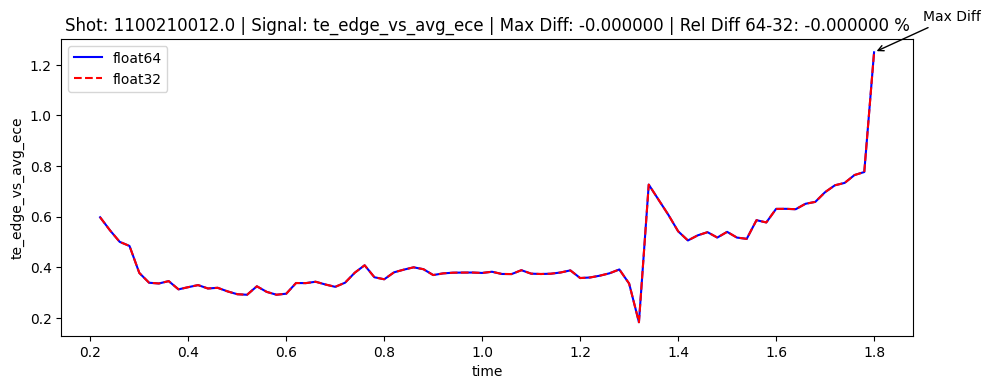

Column: te_peaking, Max Shot: 1100204004.0, Max Value: 3.380785486754037, Diff: -3.0576744247667875e-08, % Rel Diff: -0.000001%


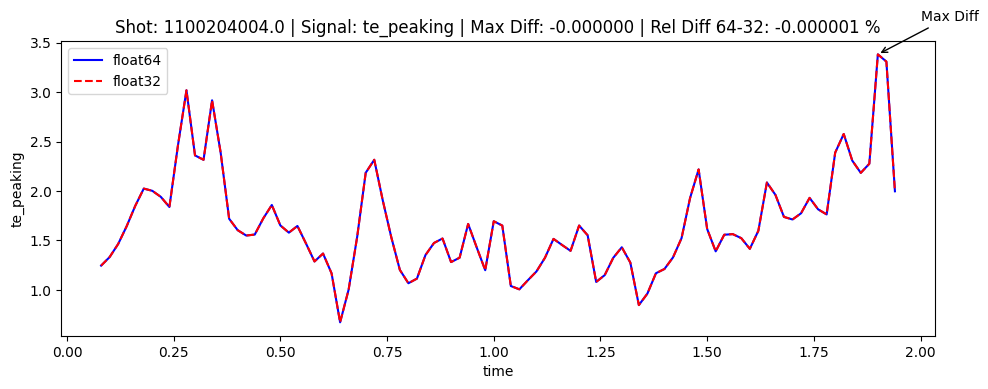

Column: te_width, Max Shot: 1091014007.0, Max Value: 0.3343940417187719, Diff: -1.4015456573091e-08, % Rel Diff: -0.000004%


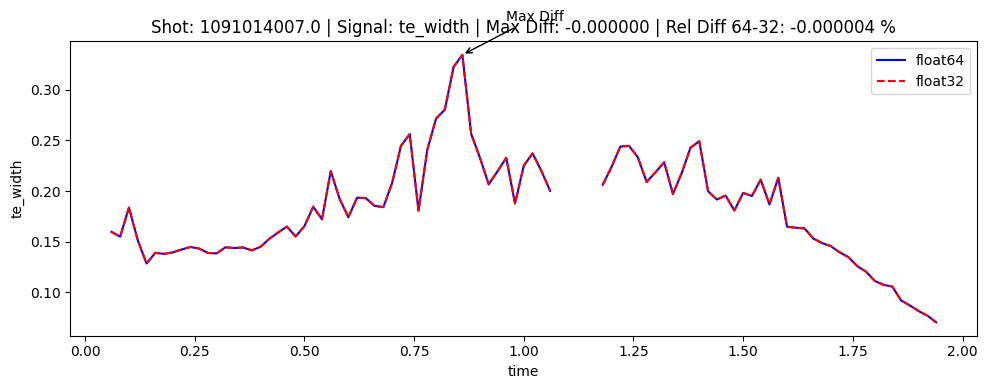

Column: te_width_ece, Max Shot: 1090914006.0, Max Value: 22940.295727181445, Diff: -0.07730614975298522, % Rel Diff: -0.000337%


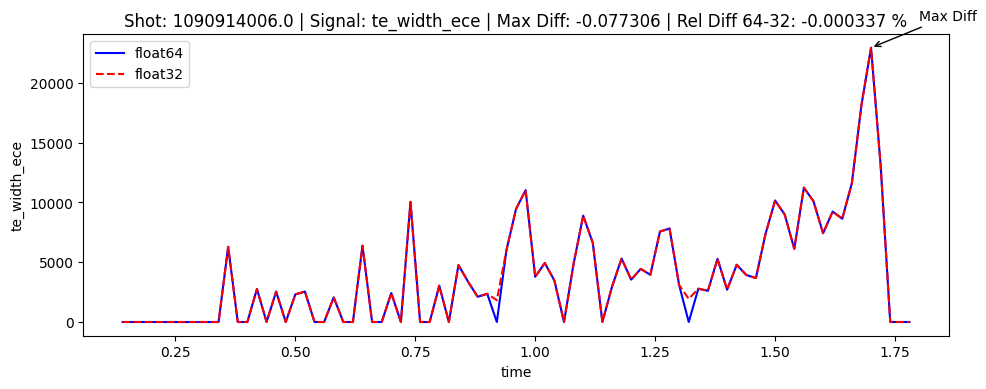

Column: tribot, Max Shot: 1090914015.0, Max Value: 0.8477118015289307, Diff: 1.5289306487531462e-09, % Rel Diff: 0.000000%


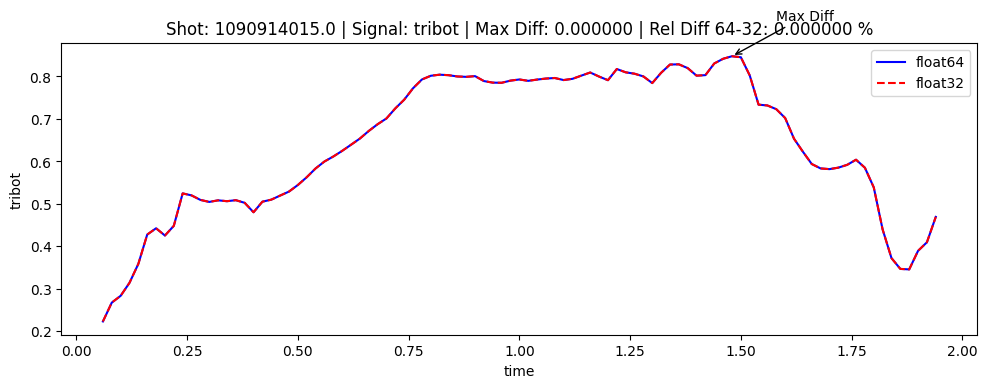

Column: tritop, Max Shot: 950523017.0, Max Value: 0.9674717783927916, Diff: -2.1607208355867158e-08, % Rel Diff: -0.000002%


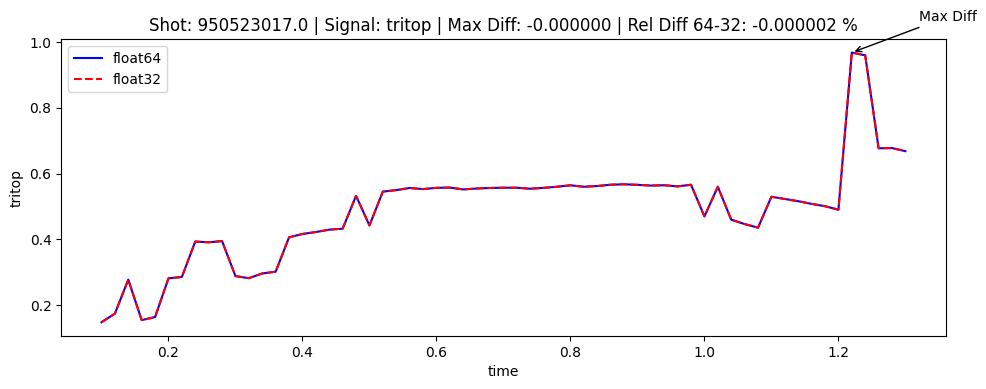

Column: upper_gap, Max Shot: 1120920017.0, Max Value: 0.6944026350975037, Diff: -4.902496297809478e-09, % Rel Diff: -0.000001%


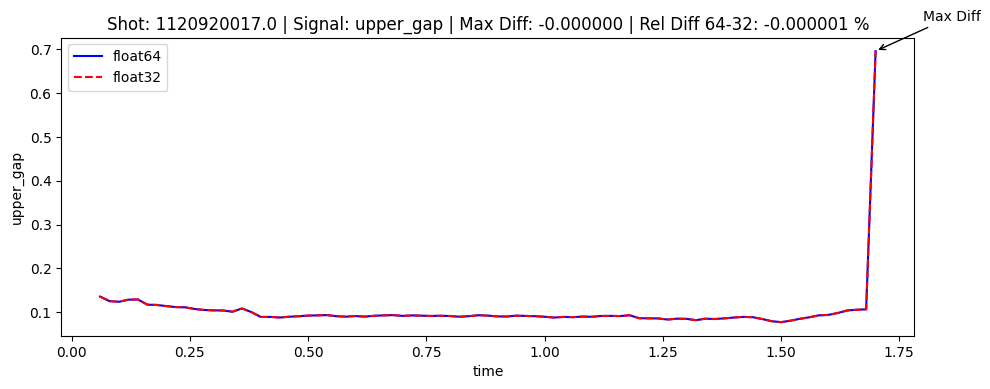

Column: v_loop_efit, Max Shot: 950329017.0, Max Value: 17.84471893310547, Diff: -6.689453257990863e-08, % Rel Diff: -0.000000%


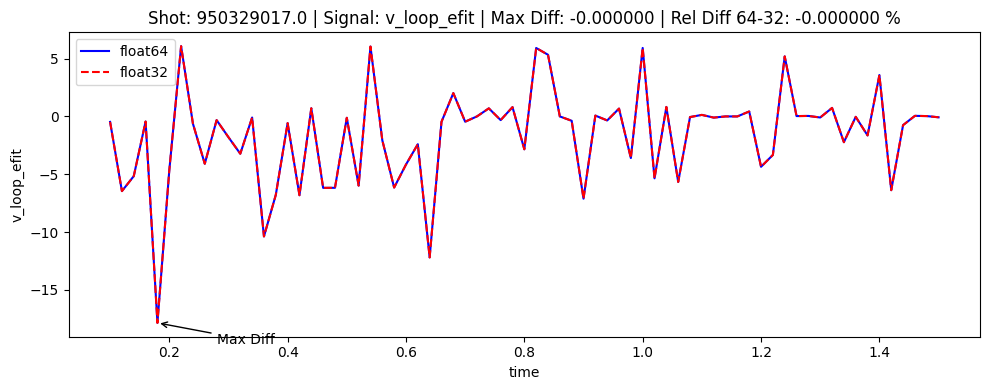

Column: v_surf, Max Shot: 1150616024.0, Max Value: 54.43301936809877, Diff: -3.035001270745852e-06, % Rel Diff: -0.000006%


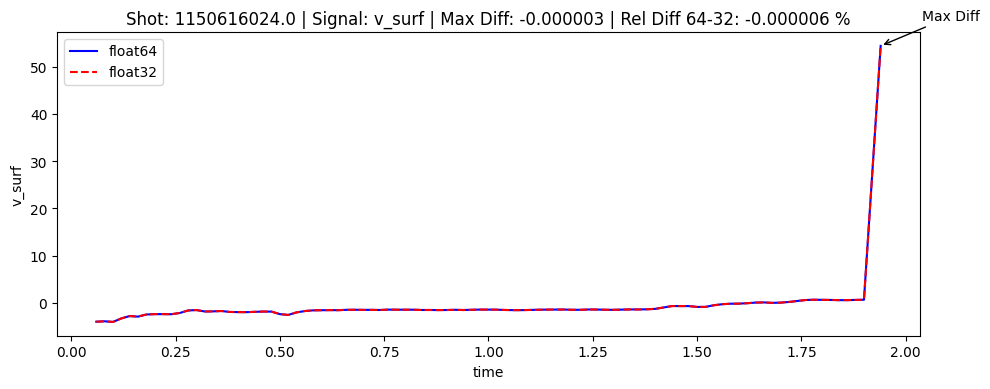

Column: v_z, Max Shot: 1160921021.0, Max Value: 105.2023418294852, Diff: -1.7163346029747117e-05, % Rel Diff: -0.000016%


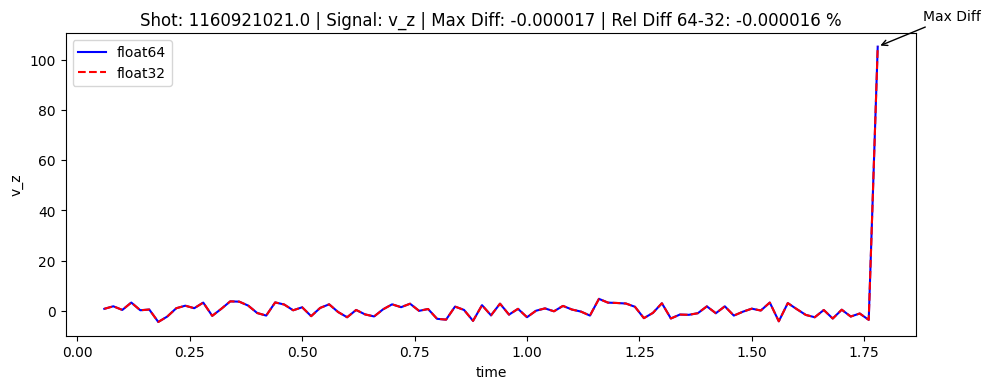

Column: wmhd, Max Shot: 1120920017.0, Max Value: 958566.0625, Diff: 0.0024999999441206455, % Rel Diff: 0.000000%


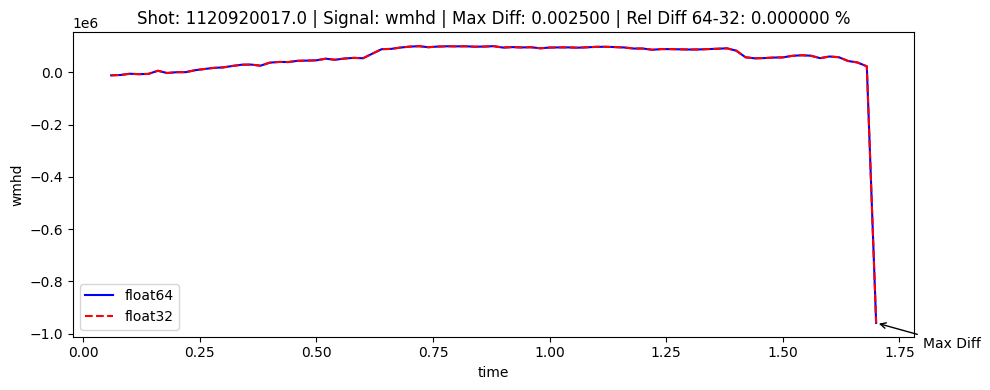

Column: z_error, Max Shot: 1160921011.0, Max Value: 0.4554850786586705, Diff: 1.9971283682362895e-08, % Rel Diff: 0.000004%


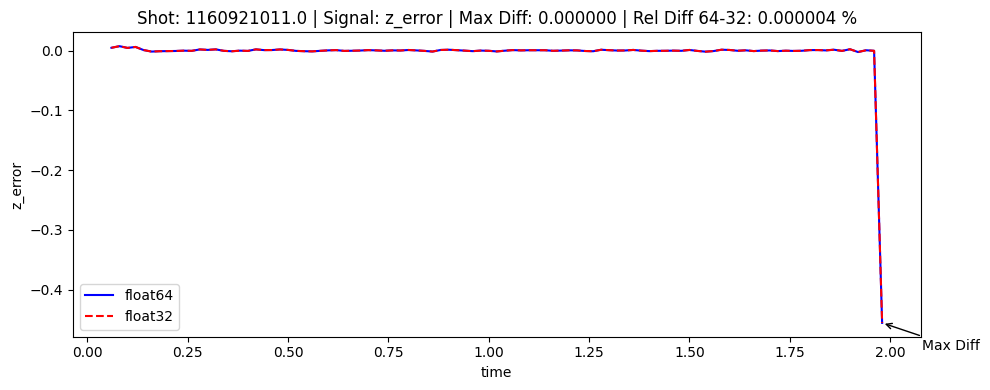

Column: z_prog, Max Shot: 1091021035.0, Max Value: 0.0269999977201222, Diff: 2.2351739903392343e-10, % Rel Diff: 0.000001%


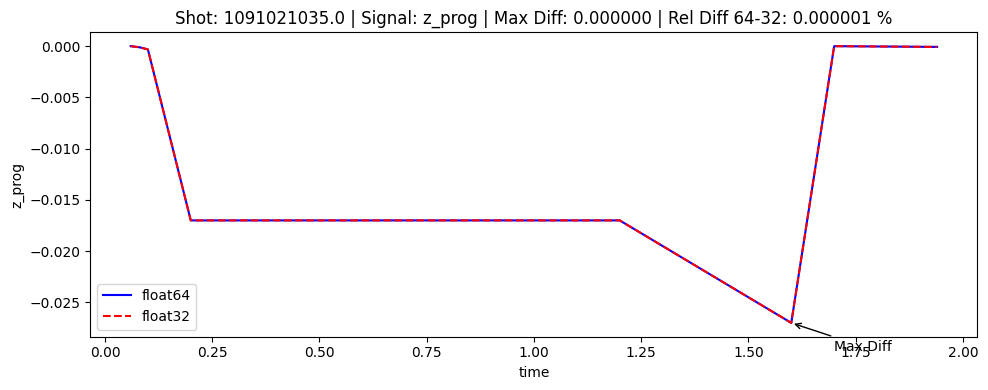

Column: z_times_v_z, Max Shot: 1160921021.0, Max Value: 17.744679249288133, Diff: -2.795404459021711e-06, % Rel Diff: -0.000016%


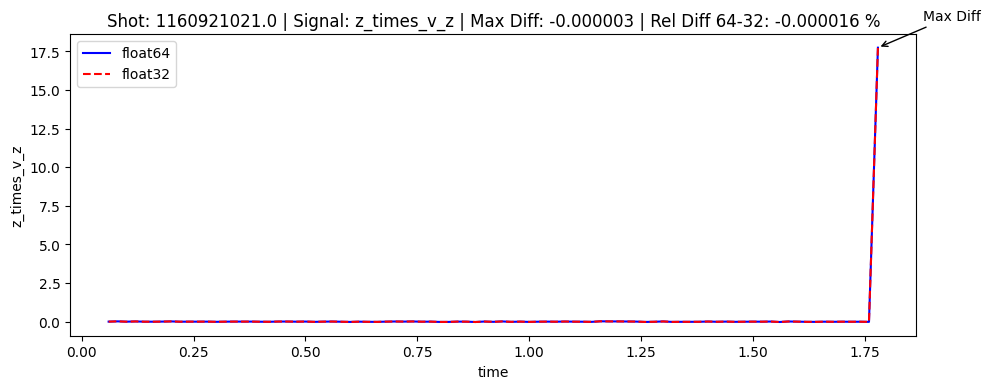

Column: zcur, Max Shot: 1160921011.0, Max Value: 0.4554468698021374, Diff: 1.997122117680661e-08, % Rel Diff: 0.000004%


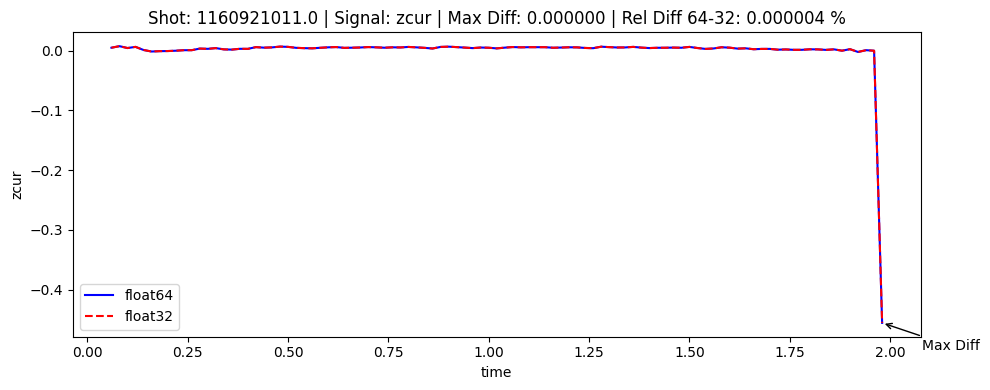

In [46]:
import matplotlib.pyplot as plt
# Get the shot numbers corresponding to the maximum values for each column in df64
for col in df64.columns:
    if diff_abs[col] == 0.0:
        continue
    elif 100 * diff_abs[col] / max_values[col] >= 1.0:
        continue
    max_shot = df64.loc[max_positions[col], 'shot']
    print(f"Column: {col}, Max Shot: {max_shot}, Max Value: {max_values[col]}, Diff: {diff_abs[col]}, % Rel Diff: {100 * diff_abs[col] / max_values[col]:.6f}%")
    shot = max_shot
    signal = col
    # Filter for the current shot
    df32_shot = df32[df32['shot'] == shot]
    df64_shot = df64[df64['shot'] == shot]
    if signal not in df32_shot.columns or signal not in df64_shot.columns:
        continue
    plt.figure(figsize=(10, 4))
    plt.plot(df64_shot['time'], df64_shot[signal], label='float64', color='b')
    plt.plot(df32_shot['time'], df32_shot[signal], label='float32', color='r', linestyle='--')
    # add an arrow to the plot indicating the maximum difference time
    max_time = df32_shot.loc[max_positions[col], 'time']
    max_value_32 = df32_shot.loc[max_positions[col], signal]
    max_value_64 = df64_shot.loc[max_positions[col], signal]
    plt.annotate('Max Diff', xy=(max_time, max_value_32), xytext=(max_time + 0.1, max_value_32 + 0.1*max_value_32),
                 arrowprops=dict(facecolor='black', arrowstyle='->'))
    plt.title(f"Shot: {shot} | Signal: {signal} | Max Diff: {diff_abs[col]:.6f} | Rel Diff 64-32: {100 * diff_abs[col] / max_values[col]:.6f} %")
    plt.xlabel('time')
    plt.ylabel(signal)
    plt.legend()
    plt.tight_layout()
    plt.show()